In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import math
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

## Problem 1.

The following functions compute and return the covariance and the correlation coefficient.

In [2]:
def sample_covariance(x, y):
    return np.cov(x,y,ddof=1)[0,1]

In [3]:
def correlation_coeff(x, y):
    return stats.pearsonr(x,y)[0]

Use these functions to answer the following questions:

In [4]:
x = np.array([97,86,89,84,94,74])
y = np.array([14,11,9,9,15,7])

#### 1. 
What happens to $r$ if you double each of the values in your data.  How does this compare to what happens to the covariance?

In [5]:
covariance1 = sample_covariance(x,y)
covariance1

22.46666666666667

In [6]:
correlation_coeff1 = correlation_coeff(x,y)
correlation_coeff1

0.8831162909634476

In [7]:
x = 2*x
y = 2*y

In [8]:
covariance1 = sample_covariance(x,y)
covariance1

89.86666666666667

In [9]:
correlation_coeff1 = correlation_coeff(x,y)
correlation_coeff1

0.8831162909634476

The r will stays the same as we double the values of the data, the covariance will times 4.

#### 2. 
What happens to $r$ if you add 100 to each value in your data set.  How does this compare to what happens to the covariance?

In [10]:
x = np.array([97,86,89,84,94,74])
y = np.array([14,11,9,9,15,7])

In [11]:
x= x+100
x

array([197, 186, 189, 184, 194, 174])

In [12]:
y = y+100

In [13]:
covariance1 = sample_covariance(x,y)
covariance1

22.46666666666667

In [14]:
correlation_coeff1 = correlation_coeff(x,y)
correlation_coeff1

0.8831162909634477

The r and covariance will stay the same.

## Problem 2.

Does skill in one sport imply skill in a related sport?  The answer might be different for different activities.  Let us find out whether it's true for the [triple jump](https://en.wikipedia.org/wiki/Triple_jump) and the vertical jump. 

`triple_vertical` has data for 40 collegiate level soccer players.  Each athlete's distance in both jump activities was measured in centimeters. We are looking specifically for a *linear* association between skill in the two sports. 

In [15]:
jumps = Table.read_table('triple_vertical.csv')
jumps

triple,vertical
383,33
781,71.1
561.62,62.25
624.52,61.33
446.24,40.19
515.3,38.96
449.22,39.69
560.91,46.51
519.12,37.68
595.38,53.48


#### 1. 
Draw the scatter plot of both distances with triple jump on the horizontal axis. Comment on the strength of the relationship.

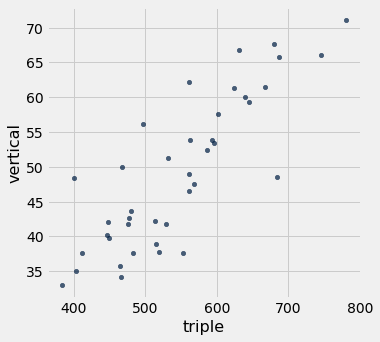

In [16]:
jumps.scatter('triple','vertical')

Generally, the scatter plot shows us a *positive* linear association: the longer the distance of triple jump, the longer the distance of vertical jump.

#### 2.
Calculate the correlation coefficient **without** using any built-in function (e.g. numpy.cov, stats.pearsonr).

In [17]:
triple_mean = np.mean(jumps.column('triple'))
vertical_mean = np.mean(jumps.column('vertical'))

triple_std = np.std(jumps.column('triple'), ddof=1)
vertical_std = np.std(jumps.column('vertical'), ddof=1)

n = jumps.num_rows

covariance = np.sum((jumps.column('triple')-triple_mean)*
                    (jumps.column('vertical')-vertical_mean))/(n-1)
normalizer = triple_std*vertical_std

r = covariance/normalizer

print('r=',round(r,6))

r= 0.834308


#### 3. 
Fit a linear regression model using triple jump distance to predict vertical jump distance. Print the summary table and plot the fitted line.

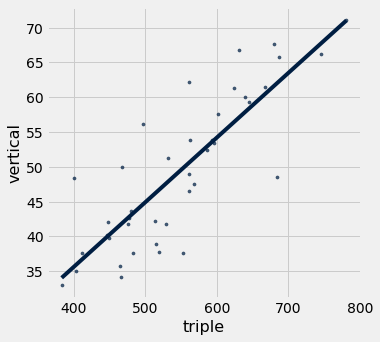

In [18]:
jumps.scatter('triple','vertical', fit_line=True, s= 10)

In [19]:
import pandas as pd
import statsmodels.formula.api as smf

jumps_df = jumps.to_df()
result = smf.ols(formula="vertical~ triple", data=jumps_df).fit()

print(result.params)
result.summary()

Intercept   -1.566521
triple       0.092957
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               vertical   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     87.03
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           2.27e-11
Time:                        13:11:00   Log-Likelihood:                -127.64
No. Observations:                  40   AIC:                             259.3
Df Residuals:                      38   BIC:                             262.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5665      5.535     -0.283      0.779     -12.772       9.639
triple         0.0930      0.010      9.329      0.000       0.073       0.113
==============================================================================
Omnibus:                        0.425   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.809   Jarque-Bera (JB):                0.047
Skew:                           0.061   Prob(JB):                        0.977
Kurtosis:                       3.115   Cond. No.                     3.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

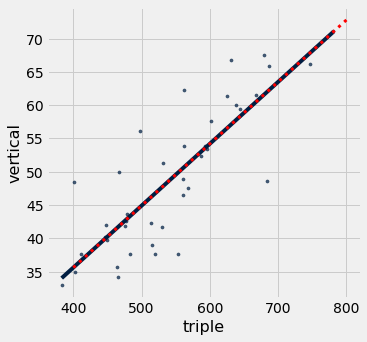

In [20]:
intercept, slope = result.params
jumps.scatter('triple','vertical', fit_line=True, s= 10)
xs = np.linspace(400,800,100)
_ = plots.plot(xs, slope*xs+intercept, color='r', lw=3, linestyle=":")

#### 4. 
Use the fitted model to predict what certain athletes' vertical jump heights would be given their triple jump distances. The world record for the triple jump distance is 18.29 *meters* by Johnathan Edwards. What's our prediction for what Edwards' vertical jump would be?

In [21]:
x = 1829
y = 0.092957*x -1.566521
y

168.451832

The vertical jump would be 168cm.

#### 5. 
What are the SSE, SST, and SSR of our model? 

Calculate the coefficient of determination ($R^2$) and the adjusted $R^2$ using these values and check it with the value given in the summary table.

In [22]:
jumps = jumps.with_columns(
        'Fitted Value', result.predict(),
        'Residual', jumps.column('vertical') - result.predict())
jumps

triple,vertical,Fitted Value,Residual
383,33,34.0361,-1.03612
781,71.1,71.0331,0.066884
561.62,62.25,50.6401,11.6099
624.52,61.33,56.4872,4.84284
446.24,40.19,39.9147,0.275264
515.3,38.96,46.3344,-7.37437
449.22,39.69,40.1917,-0.501749
560.91,46.51,50.5741,-4.06415
519.12,37.68,46.6895,-9.00946
595.38,53.48,53.7784,-0.298385


In [23]:
SSE = np.sum(jumps.column('Residual')**2)
SSE 

1384.5104685768981

In [24]:
SST = np.sum((jumps.column('vertical')-np.mean(jumps.column('vertical')))**2)
SST

4555.3496975

In [25]:
SSR = np.sum((jumps.column('Fitted Value')-np.mean(jumps.column('vertical')))**2)
SSR

3170.8392289231024

In [26]:
R2 = 1-SSE/SST
R2

0.6960693337469295

 The coefficient of determination ($R^2$)= 0.696.

In [27]:
n = jumps.num_rows
k = 1   
adjR2 = 1-(1-R2)*(n-1)/(n-k-1)
adjR2

0.6880711583192171

The adjusted $R^2$ = 0.688.

The same as the table.

#### 6. 
Using SSE, SST, and/or SSR computed above, calculate the F value for the overall fit and the p-value associated with the overall fit. 

Compare these with the values given in the summary table. Does the fit appear to be statistically significant? 


In [28]:
p = 2  #beta_0 and beta_1
n = jumps.num_rows

In [29]:
SSR = np.sum((jumps.column('Fitted Value')-np.mean(jumps.column('vertical')))**2)
SSR

3170.8392289231024

In [30]:
F = SSR/(p-1)/(SSE/(n-p))
F

87.02851544555553

In [31]:
stats.f.sf(F, p-1, n-p)

2.269638858018968e-11

The value is almost the same, p<0.05, the fit appear to be statistically significant.

## Problem 3.

Farmer Heinz is concerned about how the quantity of fertilizer (in pounds per plot) might affect the yield of tomatoes (in bushels per plot). The data are contained in the comma delimited text file `tomato.txt`.

In [32]:
tomato = Table.read_table('tomato.csv')
tomato = tomato.sort('fertilizer')
tomato.show()

plot,Yield,fertilizer
2,18,5
7,20,6
11,21,8
9,25,11
1,24,12
10,27,13
6,30,14
3,31,15
4,33,17
12,29,18


#### 1. 
Provide a scatter plot of tomato yield against the quantity of fertilizer used. Does the relationship appear to be linear?

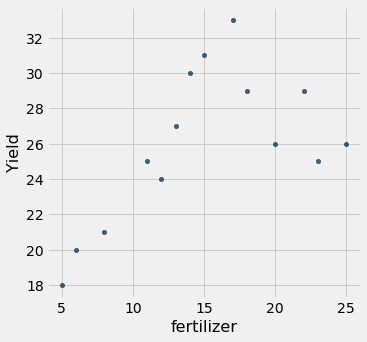

In [33]:
tomato.scatter('fertilizer','Yield')

The relationship seems not to be linear. When fertilizer is smaller than 15, the bigger the fertilizer, the bigger the yield. When fertilizer is bigger than 15, the yield will decline when the fertilizer increases.

#### 2. 
Conduct a series of regressions on these data with increasingly more complex models. Start with the null model of no relationship (formula='Yield~1'). Then proceed to a linear model, and then a model of order 2, and finally a model of order 3. 

(1). Plot all four fitted lines in a single plot.

(2). State which model you believe is the best and provide a statistically reasonable justification for your choice.

In [34]:
result0 = smf.ols(formula="Yield~1", 
                 data=tomato.to_df()).fit()
print(result0.params)

Intercept    26.0
dtype: float64


In [35]:
result1 = smf.ols(formula="Yield ~ fertilizer", 
                 data=tomato.to_df()).fit()
print(result1.params)

Intercept     19.893331
fertilizer     0.409059
dtype: float64


In [36]:
result2 = smf.ols(formula="Yield ~ fertilizer + I(fertilizer**2)", 
                 data=tomato.to_df()).fit()
print(result2.params)

Intercept             5.703112
fertilizer            2.692343
I(fertilizer ** 2)   -0.076713
dtype: float64


In [37]:
result3= smf.ols(formula="Yield ~ fertilizer + I(fertilizer**2)+I(fertilizer**3)", 
                 data=tomato.to_df()).fit()
print(result3.params)

Intercept             9.999913
fertilizer            1.542884
I(fertilizer ** 2)    0.010310
I(fertilizer ** 3)   -0.001958
dtype: float64


In [38]:
tomato1 = tomato.with_columns('prediction0', result0.predict(),'prediction1', result1.predict(),'prediction2', result2.predict(),'prediction3', result3.predict())
tomato1

plot,Yield,fertilizer,prediction0,prediction1,prediction2,prediction3
2,18,5,26,21.9386,17.247,17.7274
7,20,6,26,22.3477,19.0955,19.2055
11,21,8,26,23.1658,22.3323,22.0004
9,25,11,26,24.393,26.0367,25.6133
1,24,12,26,24.802,26.9646,26.6161
10,27,13,26,25.2111,27.7391,27.4985
6,30,14,26,25.6202,28.3603,28.2488
3,31,15,26,26.0292,28.8279,28.8553
4,33,17,26,26.8473,29.303,29.5898
12,29,18,26,27.2564,29.3104,29.6943


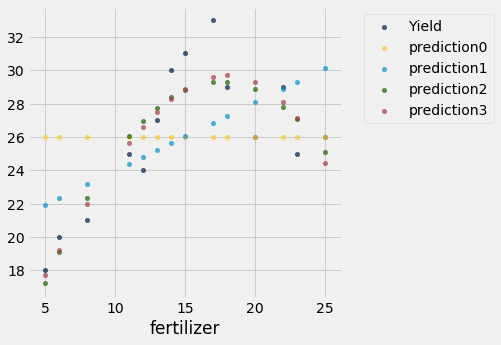

In [39]:
tomato1.scatter('fertilizer', select=make_array('Yield','prediction0','prediction1','prediction2', 'prediction3'))

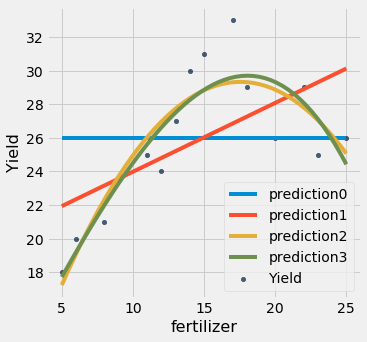

In [40]:
tomato1.scatter('fertilizer','Yield')
x = np.linspace(5,25)

plots.plot(x,result0.params[0]+x*0)
plots.plot(x,result1.params[0]+x*result1.params[1])
plots.plot(x,result2.params[0]+x*result2.params[1]+(x**2)*result2.params[2])
plots.plot(x,result3.params[0]+x*result3.params[1]+(x**2)*result3.params[2]+(x**3)*result3.params[3])
plots.legend(labels=['prediction0','prediction1','prediction2','prediction3','Yield'])

In [41]:
result2.summary()

C:\Users\Yujia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     21.20
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           0.000168
Time:                        13:11:02   Log-Likelihood:                -28.696
No. Observations:                  14   AIC:                             63.39
Df Residuals:                      11   BIC:                             65.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.7031      3.300      1.728      0.112      -1.561      12.967
fertilizer             2.6923      0.481      5.592      0.000       1.633       3.752
I(fertilizer ** 2)    -0.0767      0.016     -4.835      0.001      -0.112      -0.042
==============================================================================
Omnibus:                        0.165   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.371
Skew:                           0.073   Prob(JB):                        0.831
Kurtosis:                       2.216   Cond. No.                     1.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     13.41
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           0.000773
Time:                        13:11:02   Log-Likelihood:                -28.457
No. Observations:                  14   AIC:                             64.91
Df Residuals:                      10   BIC:                             67.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.9999      8.052      1.242      0.243      -7.942      27.941
fertilizer             1.5429      2.014      0.766      0.461      -2.945       6.031
I(fertilizer ** 2)     0.0103      0.149      0.069      0.946      -0.321       0.342
I(fertilizer ** 3)    -0.0020      0.003     -0.589      0.569      -0.009       0.005
==============================================================================
Omnibus:                        0.147   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.929   Jarque-Bera (JB):                0.359
Skew:                          -0.063   Prob(JB):                        0.836
Kurtosis:                       2.226   Cond. No.                     9.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
anova_lm(result2, result3)

C:\Users\Yujia\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Yujia\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Yujia\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,11.0,49.432849,0.0,NaN,NaN,NaN
1,10.0,47.776599,1.0,1.656249,0.346665,0.569067


This is a hypothesis on two models. The null hypothesis is that two models fit the data equally well. Since here the p-value is bigger than 0.05, we have strong evidence that the quadratic model and the cubic model are equally well. In this case, we prefer the parsimonious model, i.e., the model with fewer parameters. 
